<a href="https://colab.research.google.com/github/redadmiral/python-for-journalists/blob/main/PandasDatenAnalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datenanalyse

In diesem Abschnitt führen wir die eigentliche Analyse durch, dafür müssen wir uns zuerst klar werden welche Recherchefragen wir haben. Wir wollen anhand dieses Datensatzes folgende Fragen beantworten:

1. Haben sich die Menschen über die Corona-Zeit mehr oder weniger Hunde geholt?
2. In welchem Stadtteil gibt es die meisten/wenigsten Hunde pro Einwohner\*in?
3. Halten alte Menschen andere Hunde als Junge?

Dafür laden wir zuerst den Datensatz den wir im letzten Schritt bereinigt haben:



In [1]:
import pandas as pd

dogs = pd.read_csv("dogs.csv", index_col = 0)

# Die `groupby`-Methode

Wir wissen, dass wir den Datensatz nur jahresweise verwenden können, müssen wir ihn auf die einzelnen Jahre aufteilen.

Die naheliegende Variante dafür wäre, ihn für jedes Jahr einzeln zu filtern und die Berechnungen auf jedem entstandenen Datensatz zu wiederholen, also etwa so:

In [2]:
year22 = dogs[dogs["StichtagDatJahr"] == 2022]
year21 = dogs[dogs["StichtagDatJahr"] == 2022]
# und so weiter...
year22

,StichtagDatJahr,HalterId,AlterV10Cd,SexLang,KreisCd,KreisLang,QuarCd,QuarLang,Rasse1Text,GebDatHundJahr,AlterVHundCd,SexHundLang,HundefarbeText
52323,2022,574,70.0,weiblich,2.0,Kreis 2,23.0,Leimbach,Unbekannt,2013.0,8.0,weiblich,schwarz
52324,2022,695,50.0,männlich,6.0,Kreis 6,63.0,Oberstrass,Labrador Retriever,2012.0,9.0,weiblich,braun
52325,2022,893,70.0,weiblich,7.0,Kreis 7,71.0,Fluntern,Mittelschnauzer,2010.0,11.0,weiblich,schwarz
52326,2022,1177,60.0,männlich,10.0,Kreis 10,102.0,Wipkingen,Shih Tzu,2011.0,10.0,männlich,schwarz/weiss
52327,2022,4054,50.0,weiblich,11.0,Kreis 11,111.0,Affoltern,Lagotto Romagnolo,2016.0,5.0,weiblich,weiss/beige
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61467,2022,160175,20.0,weiblich,8.0,Kreis 8,82.0,Mühlebach,Chihuahua,2021.0,0.0,weiblich,hellbraun
61468,2022,160176,20.0,weiblich,8.0,Kreis 8,83.0,Weinegg,Zwergpudel,2012.0,9.0,weiblich,apricot
61469,2022,160178,50.0,männlich,11.0,Kreis 11,111.0,Affoltern,Shetland Sheepdog,2022.0,0.0,weiblich,tricolor
61470,2022,160182,30.0,weiblich,7.0,Kreis 7,72.0,Hottingen,Miniature American Shepard,2022.0,0.0,männlich,braun


Dann könnten wir zählen wie viele Zeilen der Datensatz hat, und so herausfinden wie viele Hunde im Jahr gemeldet wurden:

In [3]:
year22["StichtagDatJahr"].size

9149

Das über alle Jahre zu wiederholen ist aber ziemlich umständlich. Deshalb gibt es die `groupby()`-Methode.

Diese sortiert alle Zeilen anhand des Werts in einem Feld. Wenn wir zum Beispiel nach dem Jahr gruppieren wollen, dann wählen wir einfach die entsprechende Spalte "StichtagDatJahr" aus und übergeben sie der groupby-Funktion:

In [4]:
dogs.groupby("StichtagDatJahr")

Das sieht nicht sehr hilfreich aus. Das liegt daran, dass wir pandas sagen müssen was es mit all den Zeilen machen soll, die für jedes Jahr im Datensatz sind.

Nachdem wir wissen wollen, wie viele Hunde es in jedem Jahr gab, nutzen wir die `count()`-Funktion, um die einzelnen Zeilen zu zählen:

In [5]:
dogs.groupby("StichtagDatJahr").count()

,HalterId,AlterV10Cd,SexLang,KreisCd,KreisLang,QuarCd,QuarLang,Rasse1Text,GebDatHundJahr,AlterVHundCd,SexHundLang,HundefarbeText
StichtagDatJahr,,,,,,,,,,,,
2015,6951,6905,6951,6950,6951,6948,6948,6951,6948,6948,6951,6951
2016,6899,6859,6899,6898,6899,6896,6896,6899,6897,6897,6899,6899
2017,7124,7090,7124,7124,7124,7122,7122,7124,7123,7123,7124,7124
2018,7372,7340,7372,7372,7372,7370,7370,7372,7371,7371,7372,7372
2019,7616,7591,7616,7616,7616,7613,7613,7616,7615,7615,7616,7616
2020,7815,7803,7815,7815,7815,7814,7814,7815,7815,7815,7815,7815
2021,8546,8532,8546,8546,8546,8546,8546,8546,8546,8546,8546,8546
2022,9149,9137,9149,9149,9149,9149,9149,9149,9149,9149,9149,9149


Und hier sehen wir, dass der Datensatz jetzt nach dem Erfassungsjahr aufgeteilt ist und wir im Jahr 2022 das gleiche Ergebnis wie oben haben: 9149 Hunde wurden erfasst.

Wir sehen auch schon, dass sich unsere Recherchefrage bewahrheitet: Es scheinen über Corona mehr Menschen einen Hund geholt zu haben.

Im Plot sieht man das auch sehr gut:

<AxesSubplot:xlabel='StichtagDatJahr'>

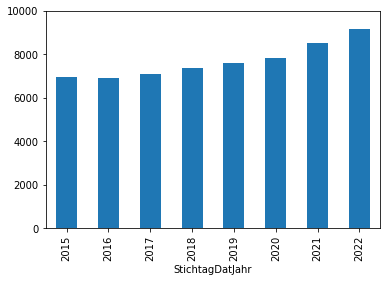

In [6]:
dogs.groupby("StichtagDatJahr")["HalterId"].count().plot(ylim=(0,10000), kind="bar")

`groupby()` braucht also immer noch eine andere Funktion, die auf den Gruppen angewandt wird, man nennt diese Funktionen Aggregationsfunktionen. Es gibt [viele verschiedene](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/), aber die, die wir am häufigsten verwenden sind der Maximalwert:

In [7]:
dogs.groupby("StichtagDatJahr")["AlterVHundCd"].max()

StichtagDatJahr
2015    20.0
2016    21.0
2017    20.0
2018    21.0
2019    21.0
2020    22.0
2021    23.0
2022    21.0
Name: AlterVHundCd, dtype: float64

Der Minimalwert:

In [8]:
dogs.groupby("StichtagDatJahr")["HalterId"].min()

StichtagDatJahr
2015    126
2016    126
2017    126
2018    126
2019    126
2020    574
2021    574
2022    574
Name: HalterId, dtype: int64

Der Mittelwert:

In [9]:
dogs.groupby("StichtagDatJahr")["AlterVHundCd"].mean()

StichtagDatJahr
2015    5.654865
2016    6.224010
2017    6.188685
2018    6.127934
2019    6.055417
2020    6.047729
2021    5.882401
2022    5.535796
Name: AlterVHundCd, dtype: float64

und der Median:

In [10]:
dogs.groupby("StichtagDatJahr")["AlterVHundCd"].median()

StichtagDatJahr
2015    5.0
2016    6.0
2017    6.0
2018    6.0
2019    6.0
2020    6.0
2021    5.0
2022    5.0
Name: AlterVHundCd, dtype: float64

Außerdem ist es möglich auf mehr als eine Spalte zu gruppieren. So können wir uns die Entwicklung für jeden Kreis nach dem Jahr ansehen, indem wir der groupby-Methode einfach eine Liste an Spalten übergeben:

In [11]:
dogs.groupby(["StichtagDatJahr", "KreisLang"]).count()


HalterId  AlterV10Cd  SexLang  KreisCd  QuarCd  \
StichtagDatJahr KreisLang                                                   
2015            Kreis 1         117         117      117      117     117   
                Kreis 10        689         681      689      689     689   
                Kreis 11       1163        1151     1163     1163    1163   
                Kreis 12        491         490      491      491     491   
                Kreis 2         603         600      603      603     603   
...                             ...         ...      ...      ...     ...   
2022            Kreis 5         321         321      321      321     321   
                Kreis 6         647         647      647      647     647   
                Kreis 7        1252        1252     1252     1252    1252   
                Kreis 8         476         475      476      476     476   
                Kreis 9        1149        1148     1149     1149    1149   

                           QuarLang  Rasse1Text  GebDatHundJahr  AlterVHundCd  \
StichtagDatJahr KreisLang                                                       
2015            Kreis 1         117         117             117           117   
                Kreis 10        689         689             689           689   
                Kreis 11       1163        1163            1163          1163   
                Kreis 12        491         491             491           491   
                Kreis 2         603         603             603           603   
...                             ...         ...             ...           ...   
2022            Kreis 5         321         321             321           321   
                Kreis 6         647         647             647           647   
                Kreis 7        1252        1252            1252          1252   
                Kreis 8         476         476             476           476   
                Kreis 9        1149        1149            1149          1149   

                           SexHundLang  HundefarbeText  
StichtagDatJahr KreisLang                               
2015            Kreis 1            117             117  
                Kreis 10           689             689  
                Kreis 11          1163            1163  
                Kreis 12           491             491  
                Kreis 2            603             603  
...                                ...             ...  
2022            Kreis 5            321             321  
                Kreis 6            647             647  
                Kreis 7           1252            1252  
                Kreis 8            476             476  
                Kreis 9           1149            1149  

[98 rows x 11 columns]

Diese Tabelle ist ziemlich groß und unübersichtlich deshalb plotten wir sie:

<AxesSubplot:xlabel='StichtagDatJahr'>

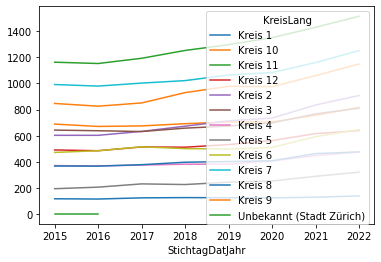

In [13]:
dogs.groupby(["StichtagDatJahr", "KreisLang"])["HalterId"].count().unstack("KreisLang").plot()


# Der `join()`

Für die nächste Recherchefrage wollen wir uns ansehen in welchem Stadtteil es die meisten Hunde pro Einwohner gibt. 

Dafür berechnen wir zuerst die Gesamtzahl an Hunden pro Kreis im Jahresmittel und teilen diese Zahl durch die Anzahl der Menschen, die im jeweiligen Kreis wohnen. 

Das machen wir wieder mit der `groupby()`-Methode und teilen durch die Anzahl an Jahren im Datensatz. Wir speichern sie in eine neue Variable `kreise`.

In [80]:
kreise = dogs.groupby("KreisLang")["HalterId"].count()/8
kreise = pd.DataFrame(kreise)
kreise

,HalterId
KreisLang,
Kreis 1,124.875
Kreis 10,713.875
Kreis 11,1294.375
Kreis 12,544.000
Kreis 2,713.000
Kreis 3,690.125
Kreis 4,401.125
Kreis 5,245.500
Kreis 6,527.625


Doch in unserem Datensatz ist gar nicht aufgeführt, wie viele Menschen in dem jeweligen Kreis leben. Diese Daten müssen wir uns aus einem anderen Datensatz holen. 

Zum Glück liefert die Stadt Zürich uns auch dafür die nötigen Zahlen. Wir können sie auf der [Homepage](https://www.stadt-zuerich.ch/prd/de/index/statistik/themen/bevoelkerung/daten.html) als [Excel-Datei herunterladen](https://www.stadt-zuerich.ch/content/dam/stzh/prd/Deutsch/Statistik/Themen/Bevoelkerung/BEV326T3260_Bevoelkerung_nach-Geschlecht-Stadtkreis-Stadtquartier.xlsx).

Der Datensatz der Stadt Zürich ist leider in keinem guten Format, weshalb ich ihn bereits bereinigt und in ein gutes Format gebracht habe. Den bereinigten Datensatz findest du [hier](https://github.com/redadmiral/python-for-journalists/blob/main/datasets/population_zurich.csv). Wenn du dich dafür interessierst, wie der Datensatz bereinigt wurde, kannst du das Notebook dazu [hier](https://github.com/redadmiral/python-for-journalists/blob/main/CleanPopulationZurich.ipynb) herunterladen.

Lass uns einen Blick in den Datensatz mit den Einwohnerzahlen werfen. Dafür laden wir den Datensatz zuerst hoch und dann mit `read_csv()` in den Workspace:

In [75]:
population = pd.read_csv("population_zurich.csv", index_col=0)
population

,Gebiet,Total,Jahr
0,Kreis 1,5817,2021
1,Rathaus,3275,2021
2,Hochschulen,701,2021
3,Lindenhof,1024,2021
4,City,817,2021
...,...,...,...
1329,Seebach,17614,1993
1330,Kreis 12,27481,1993
1331,Saatlen,6472,1993
1332,Schwamendingen-Mitte,10175,1993


Wir sehen drei Spalten: Gebiet, Total und Jahr. 

In Gebiet stehen die Kreise und Quartiere, in Total die Einwohnerzahlen und in Jahr das Erhebungsjahr.

Sehen wir uns die kreise nochmal an:

In [74]:
kreise

,HalterId
KreisLang,
Kreis 1,124.875
Kreis 10,713.875
Kreis 11,1294.375
Kreis 12,544.000
Kreis 2,713.000
Kreis 3,690.125
Kreis 4,401.125
Kreis 5,245.500
Kreis 6,527.625


Wir sehen das die Kreise aus der Spalte "Gebiet" in `population` sich in der Spalte `KreisLang` wiederfinden. Hier sind sie aber fett gedruckt.

Das heißt, dass pandas diese Spalte als Index benutzt. Der Index ist eine besondere Spalte in Pandas: Sie wird intern dazu genutzt, um auf die Zeilen zuzugreifen, ein bisschen wie die Seitenzahlen in einem Buch dabei helfen, schneller eine bestimmte Seite wiederzufinden.

Wir wollen jetzt die Einwohnerzahlen aus `population` den Kreisen im DataFrame `kreise` zuordnen. Das können wir indem wir die beiden Datensätze verbinden. Pandas hat dafür die `join()`-Methode.

Die join-Methode schaut sich die Indizes von zwei DataFrames an, und wenn die Indizes gleich sind, klebt sie die Spalten einer Tabelle an die andere.

Nachdem wir uns die Zahlen für die Jahresmittel ansehen wollen und oben auch deshalb die Anzahl an Hunden durch die Zahl an Jahren geteilt haben, müssen wir noch die mittlere Einwohnerzahl der Jahre 2015 bis 2021 berechnen. 

Die Einwoherzahlen beginnen in 1993, wir müssen also die Jahre herausfiltern, die wir nicht in unserem Hundedatensatz haben.

In [89]:
population_after_15 = population[population["Jahr"] >= 2015]
population_after_15

,Gebiet,Total,Jahr
0,Kreis 1,5817,2021
1,Rathaus,3275,2021
2,Hochschulen,701,2021
3,Lindenhof,1024,2021
4,City,817,2021
...,...,...,...
317,Seebach,24991,2015
318,Kreis 12,31753,2015
319,Saatlen,8508,2015
320,Schwamendingen-Mitte,11315,2015


Den Mittelwert der Gebiete über die Jahre berechnen wir wieder mit der `groupby()`-Methode.

In [90]:
population_mean = population_after_15.groupby("Gebiet")["Total"].mean()
population_mean = pd.DataFrame(population_mean)
population_mean

,Total
Gebiet,
Affoltern,26359.285714
Albisrieden,21720.571429
Alt-Wiedikon,17603.714286
Altstetten,33262.714286
City,816.714286
Enge,9552.142857
Escher Wyss,6006.142857
Fluntern,8399.714286
Friesenberg,10946.857143


Hier sehen wir nun die mittleren Einwohnerzahlen für die Jahre 2015-2021 für alle Quartiere und Kreise. Außerdem bemerken wir, dass durch das `groupby()` die Gebiete jetzt auch der Index der Tabelle sind.

Dass nicht nur die Kreise, sondern auch die Quartiere mit in der Tabelle aufgeführt sind ist kein Problem: Nachdem sie in `kreise` nicht vorkommen, werden sie beim `join()` einfach weggelassen.

In [91]:
kreise_pop = kreise.join(population_mean)
kreise_pop

,HalterId,Total
KreisLang,,
Kreis 1,124.875,5740.285714
Kreis 10,713.875,40191.142857
Kreis 11,1294.375,75052.000000
Kreis 12,544.000,32402.142857
Kreis 2,713.000,34121.000000
Kreis 3,690.125,50184.000000
Kreis 4,401.125,28894.285714
Kreis 5,245.500,15558.428571
Kreis 6,527.625,34219.714286


Wir sehen dass nach dem `join()` die beiden Tabellen verbunden sind und für jeden Kreis nun auch die Einwohnerzahl angegeben ist.

Außerdem sehen wir, dass in der letzten Zeile bei "Unbekannt (Stadt Zürich)" keine Einwohnerzahl angegeben ist. Das liegt daran, dass dieser Index in der Tabelle `population_mean` nicht existiert. 

Die Standardeinstellung von `join()` ist es, dass die Tabelle auf der die `join()`-Methode aufgerufen wird immer ganz erhalten bleibt. Nachdem wir hier `kreise.join()` aufgerufen haben, ist `kreise` erhalten geblieben.

Diese Art des joins nennt sich Left-Join, weil die linke Tabelle ganz bleibt und die rechte Tabelle, also die als zweites aufgerufen wird angestückelt wird.

Es gibt noch andere Arten des Joins:

- `inner`: Nur Indizes, die in beiden DataFrames enthalten sind, werden gejoined.
- `outer`: Alle Indizes werden gejoined
- `right`: Alle Indizes im rechten DataFrame sind im Ergebnis enthalten.

Wir können mit dem Argument `how` auswählen auf welche Art wir joinen möchten:

In [96]:
kreise_pop = kreise.join(population_mean, how="inner")
kreise_pop

,HalterId,Total
Kreis 1,124.875,5740.285714
Kreis 10,713.875,40191.142857
Kreis 11,1294.375,75052.000000
Kreis 12,544.000,32402.142857
Kreis 2,713.000,34121.000000
Kreis 3,690.125,50184.000000
Kreis 4,401.125,28894.285714
Kreis 5,245.500,15558.428571
Kreis 6,527.625,34219.714286
Kreis 7,1069.750,37959.571429


Die Spaltennamen sind noch etwas nichtssagend, deshalb passen wir sie kurz an:

In [98]:
kreise_pop.columns = ["AnzahlHunde", "Einwohner"]
kreise_pop

,AnzahlHunde,Einwohner
Kreis 1,124.875,5740.285714
Kreis 10,713.875,40191.142857
Kreis 11,1294.375,75052.000000
Kreis 12,544.000,32402.142857
Kreis 2,713.000,34121.000000
Kreis 3,690.125,50184.000000
Kreis 4,401.125,28894.285714
Kreis 5,245.500,15558.428571
Kreis 6,527.625,34219.714286
Kreis 7,1069.750,37959.571429


Jetzt können wir mit der eigentlichen Analyse starten: Wir müssen die Zahl der Hunde in jedem Kreis durch die Zahl der Einwohner teilen.

Dafür benutzen wir die `apply()`-Methode. Wenn wir diese auf einem DataFrame ausführen, dann wird jede Spalte an eine vorher definierte Funktion übergeben. 

Wir spielen das kurz an einem einfachen Beispiel durch:

In [102]:
df = pd.DataFrame({"Spalte1": [1, 2, 3], "Spalte2": [4, 5, 6]})
df

,Spalte1,Spalte2
0,1,4
1,2,5
2,3,6


Wir können jetzt eine Funktion schreiben, die eine Spalte als Input nimmt und damit irgendetwas macht. Als Beispiel berechnen wir den Mittelwert jeder Spalte:

In [103]:
def calc_mean(col):
  return col.mean()

df.apply(calc_mean)

Spalte1    2.0
Spalte2    5.0
dtype: float64

Wir können die `mean()`-Methode hier anwenden, weil die `apply()`-Methode die einzelnen Spalten als `Series`-Objekt übergibt.

In [107]:
def calc_mean(col):
  return str(type(col))

df.apply(calc_mean)

Spalte1    <class 'pandas.core.series.Series'>
Spalte2    <class 'pandas.core.series.Series'>
dtype: object

Wir können hier also jede Methode und jede Funktion anwenden, die wir auf `Series`-Objekte anwenden können. Welche das sind können wir [hier in der Dokumentation](https://pandas.pydata.org/docs/reference/series.html) nachlesen.

Wir können die `apply()`-Methode nicht nur auf Spalten sondern auch auf Zeilen anwenden. Dafür müssen wir das Argument `axis=1` mitgeben. 

In [108]:
def calc_mean(col):
  return col.mean()

df.apply(calc_mean, axis=1)

0    2.5
1    3.5
2    4.5
dtype: float64

Und nach diesem Prinzip können wir jetzt die beiden Elemente `Einwohner` und `AnzahlHunde` aus jeder Spalte nehmen und durcheinander teilen.

Das Ergebnis schreiben wir in eine neue Spalte `AnzahlHunde`.

In [101]:
def percentage(row):
  return row["AnzahlHunde"]/row["Einwohner"]*100

kreise_pop["HundePro100Einwohner"] = kreise_pop.apply(percentage, axis=1)
kreise_pop

,AnzahlHunde,Einwohner,HundePro100Einwohner
Kreis 1,124.875,5740.285714,2.175414
Kreis 10,713.875,40191.142857,1.776200
Kreis 11,1294.375,75052.000000,1.724638
Kreis 12,544.000,32402.142857,1.678901
Kreis 2,713.000,34121.000000,2.089622
Kreis 3,690.125,50184.000000,1.375189
Kreis 4,401.125,28894.285714,1.388250
Kreis 5,245.500,15558.428571,1.577923
Kreis 6,527.625,34219.714286,1.541874
Kreis 7,1069.750,37959.571429,2.818130


Und weil es übersichtlicher ist, erstellen wir noch schnell einen Barplot:

<AxesSubplot:>

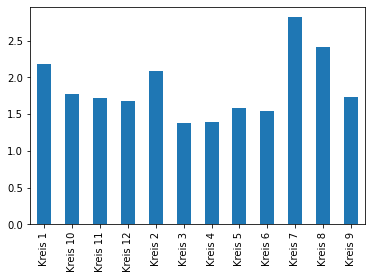

In [100]:
kreise_pop["HundePro100Einwohner"].plot(kind="bar")

# Hunderassen nach Alter der Halter\*innen

In [21]:
dogs

,StichtagDatJahr,HalterId,AlterV10Cd,SexLang,KreisCd,KreisLang,QuarCd,QuarLang,Rasse1Text,GebDatHundJahr,AlterVHundCd,SexHundLang,HundefarbeText
0,2015,126,60.0,männlich,9.0,Kreis 9,92.0,Altstetten,Welsh Terrier,2011.0,3.0,weiblich,schwarz/braun
1,2015,574,60.0,weiblich,2.0,Kreis 2,23.0,Leimbach,Cairn Terrier,2002.0,12.0,weiblich,brindle
2,2015,695,40.0,männlich,6.0,Kreis 6,63.0,Oberstrass,Labrador Retriever,2012.0,2.0,weiblich,braun
3,2015,893,60.0,weiblich,7.0,Kreis 7,71.0,Fluntern,Mittelschnauzer,2010.0,4.0,weiblich,schwarz
4,2015,1177,50.0,männlich,10.0,Kreis 10,102.0,Wipkingen,Shih Tzu,2011.0,3.0,männlich,schwarz/weiss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61467,2022,160175,20.0,weiblich,8.0,Kreis 8,82.0,Mühlebach,Chihuahua,2021.0,0.0,weiblich,hellbraun
61468,2022,160176,20.0,weiblich,8.0,Kreis 8,83.0,Weinegg,Zwergpudel,2012.0,9.0,weiblich,apricot
61469,2022,160178,50.0,männlich,11.0,Kreis 11,111.0,Affoltern,Shetland Sheepdog,2022.0,0.0,weiblich,tricolor
61470,2022,160182,30.0,weiblich,7.0,Kreis 7,72.0,Hottingen,Miniature American Shepard,2022.0,0.0,männlich,braun


In [61]:
dogs.groupby(["AlterV10Cd", "Rasse1Text"]).count().sort_values(["AlterV10Cd", "HalterId"], ascending=False).groupby(level=0).head(2)

StichtagDatJahr  HalterId  SexLang  KreisCd  \
AlterV10Cd Rasse1Text                                                        
90.0       Unbekannt                        25        25       25       25   
           Pudel                            21        21       21       21   
80.0       Unbekannt                       192       192      192      192   
           Pudel                           112       112      112      112   
70.0       Unbekannt                       771       771      771      771   
           Labrador Retriever              343       343      343      343   
60.0       Unbekannt                      1164      1164     1164     1164   
           Labrador Retriever              536       536      536      536   
50.0       Unbekannt                      1688      1688     1688     1688   
           Labrador Retriever              847       847      847      847   
40.0       Unbekannt                      1479      1479     1479     1479   
           Chihuahua                       888       888      888      888   
30.0       Unbekannt                      1738      1738     1738     1738   
           Chihuahua                      1130      1130     1130     1130   
20.0       Unbekannt                       778       778      778      778   
           Chihuahua                       759       759      759      759   
10.0       Unbekannt                        18        18       18       18   
           Yorkshire Terrier                16        16       16       16   

                               KreisLang  QuarCd  QuarLang  GebDatHundJahr  \
AlterV10Cd Rasse1Text                                                        
90.0       Unbekannt                  25      25        25              25   
           Pudel                      21      21        21              21   
80.0       Unbekannt                 192     192       192             192   
           Pudel                     112     112       112             112   
70.0       Unbekannt                 771     771       771             771   
           Labrador Retriever        343     343       343             343   
60.0       Unbekannt                1164    1164      1164            1164   
           Labrador Retriever        536     536       536             536   
50.0       Unbekannt                1688    1688      1688            1688   
           Labrador Retriever        847     847       847             847   
40.0       Unbekannt                1479    1479      1479            1479   
           Chihuahua                 888     888       888             888   
30.0       Unbekannt                1738    1738      1738            1738   
           Chihuahua                1130    1130      1130            1130   
20.0       Unbekannt                 778     778       778             778   
           Chihuahua                 759     759       759             759   
10.0       Unbekannt                  18      18        18              18   
           Yorkshire Terrier          16      16        16              16   

                               AlterVHundCd  SexHundLang  HundefarbeText  
AlterV10Cd Rasse1Text                                                     
90.0       Unbekannt                     25           25              25  
           Pudel                         21           21              21  
80.0       Unbekannt                    192          192             192  
           Pudel                        112          112             112  
70.0       Unbekannt                    771          771             771  
           Labrador Retriever           343          343             343  
60.0       Unbekannt                   1164         1164            1164  
           Labrador Retriever           536          536             536  
50.0       Unbekannt                   1688         1688            1688  
           Labrador Retriever           847          847             847  
40.0     

In [71]:
dogs[dogs["Rasse1Text"] != "Unbekannt"].groupby(["AlterV10Cd", "Rasse1Text"]).count().sort_values(["AlterV10Cd", "HalterId"], ascending=False).groupby(level=0).head(5).apply(lambda x: x/8)

StichtagDatJahr  HalterId  SexLang  \
AlterV10Cd Rasse1Text                                                   
90.0       Pudel                             2.625     2.625    2.625   
           Chihuahua                         2.000     2.000    2.000   
           Malteser                          1.875     1.875    1.875   
           Yorkshire Terrier                 1.625     1.625    1.625   
           Labrador Retriever                1.375     1.375    1.375   
80.0       Pudel                            14.000    14.000   14.000   
           Chihuahua                        10.500    10.500   10.500   
           Yorkshire Terrier                10.500    10.500   10.500   
           Labrador Retriever                9.875     9.875    9.875   
           Zwergpudel                        7.375     7.375    7.375   
70.0       Labrador Retriever               42.875    42.875   42.875   
           Dachshund                        31.250    31.250   31.250   
           Chihuahua                        28.375    28.375   28.375   
           Yorkshire Terrier                27.750    27.750   27.750   
           Jack Russel Terrier              21.000    21.000   21.000   
60.0       Labrador Retriever               67.000    67.000   67.000   
           Chihuahua                        49.000    49.000   49.000   
           Jack Russel Terrier              46.375    46.375   46.375   
           Yorkshire Terrier                46.250    46.250   46.250   
           Malteser                         38.625    38.625   38.625   
50.0       Labrador Retriever              105.875   105.875  105.875   
           Chihuahua                        95.750    95.750   95.750   
           Yorkshire Terrier                77.750    77.750   77.750   
           Jack Russel Terrier              69.125    69.125   69.125   
           Malteser                         48.750    48.750   48.750   
40.0       Chihuahua                       111.000   111.000  111.000   
           Labrador Retriever              100.500   100.500  100.500   
           Jack Russel Terrier              61.875    61.875   61.875   
           Yorkshire Terrier                57.375    57.375   57.375   
           Malteser                         52.500    52.500   52.500   
30.0       Chihuahua                       141.250   141.250  141.250   
           Französische Bulldogge          101.750   101.750  101.750   
           Labrador Retriever               96.375    96.375   96.375   
           Mops                             57.750    57.750   57.750   
           Jack Russel Terrier              56.625    56.625   56.625   
20.0       Chihuahua                        94.875    94.875   94.875   
           Französische Bulldogge           62.875    62.875   62.875   
           Zwergspitz                       31.500    31.500   31.500   
           Labrador Retriever               26.125    26.125   26.125   
           Mops                             23.875    23.875   23.875   
10.0       Yorkshire Terrier                 2.000     2.000    2.000   
           Chihuahua                         1.875     1.875    1.875   
           Französische Bulldogge            1.375     1.375    1.375   
           Zwergspitz                        1.250     1.250    1.250   
           Labrador Retriever                1.125     1.125    1.125   

                                   KreisCd  KreisLang   QuarCd  QuarLang  \
AlterV10Cd Rasse1Text                                                      
90.0       Pudel                     2.625      2.625    2.625     2.625   
           Chihuahua                 2.000      2.000    2.000     2.000   
           Malteser                  1.875      1.875    1.875     1.875   
           Yorkshire Terrier         1.625      1.625    1.625     1.625   
           Labrador Retriever        1.375      1.375    1.375     1.375   
80.0       Pudel                    14.000     14.000   14.000    14.00